# Predicting Board Game Scores Using Clustering & Linear Regression

In this project, we will predict the 'average rating' that a human would give to a new, unreleased, board game.

The following dataset is from BoardGameGeek, and contains data on 80000 board games. Here's a list of key columns:

- name - name of the board game
- playingtime - the playing time (given by the manufacturer)
- minplaytime - the minimum playing time (given by the manufacturer)
- maxplaytime - the maximum playing time (given by the manufacturer)
- minage - the minimum recommended age to play
- users_rated - the number of users who rated the game
- average_rating - the average rating given to the game by users (0-10)
- total_weights - number of weights given by users i.e. how "deep" or involved a game is
- average_weight - the average of all the subjective weights (0-5)

## Introduction To The Data Set

In [1]:
# import pandas library
import pandas

# read in data
games = pandas.read_csv(r"C:\projectdatasets\boardgames.csv")

# print the names of columns
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


In [2]:
# show how many rows and columns
print(games.shape)
print()

# view the top 5 rows
games.head()

(81312, 20)



,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


## Plotting Target Variable

It would be interesting to predict the 'average rating' that a human would give to a new, unreleased, board game. Predicting this column could be useful to board game manufacturers who are thinking of what kind of game to make next

We will plot a histogram of this column to visualise the distribution of ratings

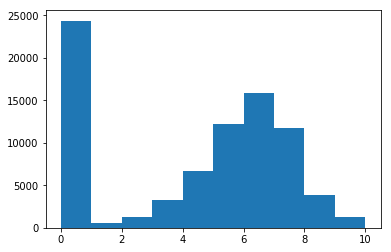

In [4]:
# import matplotlib
import matplotlib.pyplot as plt

# make histogram of all the ratings in the 'average_rating' column
plt.hist(games["average_rating"])
plt.show()

We can see quite a few games with a 0 rating (around 24000). There's a fairly normal distribution of ratings, with some left skew, and a mean rating around 6 (if you remove the zeros).

## Exploring The 0 Ratings

In [5]:
# see the first 5 rows with 0 ratings
games[games["average_rating"] == 0].head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
13048,318,boardgame,Looney Leo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0
13068,579,boardgame,Field of Fire,2002.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13114,894,boardgame,LifeLinks,2000.0,1.0,8.0,10.0,10.0,10.0,8.0,0,0.0,0.0,2,0,1,1,0,0,0.0
13116,897,boardgame,Dear Abby,1992.0,3.0,4.0,60.0,60.0,60.0,13.0,0,0.0,0.0,7,1,0,0,0,0,0.0
13124,946,boardgame,Rolazone,1999.0,2.0,2.0,30.0,30.0,30.0,0.0,0,0.0,0.0,0,0,0,3,0,0,0.0


In [6]:
# print the first row of all the games with zero scores. The .iloc method on dataframes allows us to index by position
print(games[games["average_rating"] == 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object


In [7]:
# print the first row of all the games with scores greater than 0
print(games[games["average_rating"] > 0].iloc[0])

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object


This shows  the main difference between a game with a 0 rating, and a game with a rating above 0, is that the 0 rated game has no reviews ('user_rates' is 0). By filtering out board games with 0 reviews, we can remove much of the noise.

## Remove Games Without Reviews

Many machine learning algorithms can't work with missing values, so we need to deal with them.

In [8]:
# remove rows without user reviews
games = games[games["users_rated"] > 0]

# remove any rows with missing values
games = games.dropna(axis=0)

# the number of rows is now 56894 (previously it was 81312)

## Clustering Games

There may be distinct sets of games. One set (which we just removed) was a set without reviews. Another set could be highly rated games. We can determine sets using clustering, enabling you to find patterns within your data easily by grouping similar rows (or, in this case, games), together.

We will use a clustering technique called k-means clustering. Scikit-learn is a library of algorithms, including k-means clustering, random forests, support vector machines, and logistic regression. It has a consistent API for accessing these algorithms.

We intialise the algorithm using two parameters - 'n_clusters' defines how many clusters of games, and 'random_state' is a random seed to reproduce our results later.

Most machine learning algorithms can't operate on text data, and can only take numbers as input. Getting only the numeric columns removes type and name, which aren't usable by the clustering algorithm.

Finally, we will fit our kmeans model to our data, and get the cluster assignment labels for each row

In [9]:
# import the kmeans clustering model
from sklearn.cluster import KMeans

# initialize the model with 2 parameters - number of clusters and random state
kmeans_model = KMeans(n_clusters=5, random_state=1)

# get only the numeric columns from games
good_columns = games._get_numeric_data()

# fit the model using  good columns
kmeans_model.fit(good_columns)

# get the cluster assignments
labels = kmeans_model.labels_

In [11]:
print(kmeans_model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)


In [19]:
print(labels)   # cluster assignment labels

[4 3 3 ... 0 0 0]


## Plotting Clusters Using PCA

We will plot the clusters, but our data has many columns. It's hard to visualize things in more than 3 dimensions. So we need to reduce the dimensionality of our data, without losing too much information. We do this via Principal Component Analysis (PCA). 

PCA takes multiple columns, and turns them into fewer columns, while trying to preserve the unique information in each column e.g. we have two columns; total_owners, and total_traders. There is some correlation and overlapping between these columns. So PCA will compress this information into one column with new numbers.

We will turn our board game data into two dimensions, or columns, to plot out. PCA are widely used when preprocessing data for machine learning algorithms (it isn't a machine learning technique)


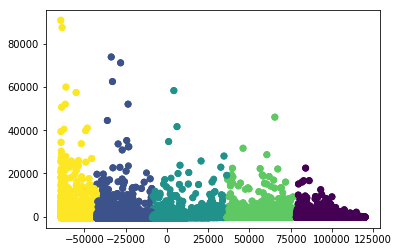

In [31]:
# import PCA model
from sklearn.decomposition import PCA

# create a PCA model
pca_2 = PCA(2)   # number of columns

# fit PCA model on the numeric columns from earlier
plot_columns = pca_2.fit_transform(good_columns)

# data set now consists of two columns of data, and a label, indicating its cluster

# make scatter plot of each game, shaded according to cluster assignment
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)    #5 colours, as 5 labels

# Show the plot.
plt.show()

The plot shows 5 distinct clusters. We could dive more into which games are in each cluster to learn more about what factors cause games to be clustered.

In [26]:
print(plot_columns) # plots 2 columns (as made PCA 2)

[[-51821.98959181  33792.71233544]
 [ 56544.18720252  22241.70173321]
 [ 38674.09331861  15583.92594558]
 ...
 [120103.35686971   -204.41272395]
 [120166.39405802   -221.80911938]
 [120168.37069677   -220.70251732]]


## Identifying What To Predict

Before doing machine learning, we need to determine how we're going to measure error, and what we're going to predict. The column 'average_rating' might be good to predict on, and our exploration reinforces this idea.

There are a variety of ways to measure error. When we're doing regression (i.e. predicting continuous variables) we need a different error metric than when we're performing classification (i.e. predicting discrete values)

For this case, we'll use Mean Squared Error (MSE) - it's easy to calculate, and simple to understand. It shows us how far, on average, our predictions are from the actual values.

## Finding Correlations

As we want to predict 'average_rating', we could find the correlation between 'average_rating' and other columns, to show us which other columns might predict 'average_rating' the best. We can use the Pandas 'corr' method to find correlations for the 'average_rating' column.

In [32]:
games.corr()["average_rating"]

id                      0.304201
yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

We can see the 'average_weight' and 'id' columns correlate best to rating. ids are systems keys, so we will ignore. 'Average_weight' indicates the "depth" or complexity of a game, so it might be that more complex games are reviewed better.

## Picking Predictor Columns

Before we predict, we will select only the columns relevant when training our algorithm i.e. remove columns that aren't numeric.

Also, we will remove columns that can only be computed if you ALREADY know the average rating (i.e. columns derived from the predictor column). Including these columns will destroy the classifier, which is to predict the rating without any previous knowledge. Using columns that can only be computed WITH KNOWLEDGE of the target can lead to overfitting, where your model is good in a training set, but doesn't generalize to future data.

The 'bayes_average_rating' column appears to be derived from average_rating, so we will remove it.

In [33]:
# get all columns from the dataframe
columns = games.columns.tolist()

columns

['id',
 'type',
 'name',
 'yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'average_rating',
 'bayes_average_rating',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [35]:
# filter columns to remove ones we don't want
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name"]]

In [36]:
# store the target variable to predict on
target = "average_rating"

## Splitting Into Training and Test Data

We want to figure out how accurate an algorithm is, using error metrics. However, evaluating the algorithm on the same data it has been trained on will lead to overfitting. 

We want the algorithm to learn generalized rules to make predictions, not memorize how to make specific predictions e.g. consider learning math. If you memorise 1+1=2, and 2+2=4, you can answer any questions about 1+1 and 2+2. You'll have 0 error. However, if you're asked something outside your training set, like 3+3, you can't solve it. But, if you generalize and learn addition, you'll occasionally make mistakes because you haven't memorised the solutions - maybe you'll get 3453 + 353535 wrong by one, but can solve any other addition problem given.

If your error looks very low when you're training a ML algorithm, you should check overfitting (which means algorithm won't generalise well). To prevent overfitting, we will train our algorithm on a set consisting of 80% of the data, and test it on 20% of the data. To do this, randomly sample 80% of rows for the training set, then put everything else in the testing set.

In [53]:
# generate the training set (80% of records).  Set random_state to replicate results
train = games.sample(frac=0.8, random_state=1)

train

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
2602,111417,boardgame,The Great Heartland Hauling Co.,2013.0,2.0,4.0,30.0,30.0,30.0,10.0,1119,7.06652,6.45824,1892,43,246,609,327,88,1.8977
9023,8754,boardgame,The Moscow Campaign,1972.0,2.0,2.0,120.0,120.0,120.0,12.0,44,6.40455,5.54069,139,10,6,8,32,12,2.4167
13467,2231,boardgame,Watch,1967.0,2.0,2.0,10.0,10.0,10.0,6.0,20,5.97500,0.00000,35,1,1,5,17,4,2.2500
16387,7825,boardgame,Tracks to Titicaca,1996.0,2.0,6.0,180.0,180.0,180.0,0.0,15,6.16667,0.00000,45,5,9,7,6,1,4.0000
21392,14723,boardgame,El Dorado,1981.0,2.0,6.0,0.0,0.0,0.0,10.0,4,5.75000,0.00000,33,0,0,0,1,0,0.0000
68903,147907,boardgame,AFL the Board Game,2013.0,2.0,6.0,60.0,60.0,60.0,6.0,1,7.00000,0.00000,1,0,0,2,0,0,0.0000
48968,65659,boardgame,Ninjistics,2010.0,2.0,6.0,30.0,30.0,30.0,8.0,1,6.00000,0.00000,2,0,0,1,0,0,0.0000
33009,28893,boardgame,Strawberry Shortcake Big Easy Game,0.0,2.0,4.0,0.0,0.0,0.0,3.0,1,3.00000,0.00000,3,0,0,1,0,1,1.0000
27026,21678,boardgame,Scoop's Surprises,2004.0,2.0,4.0,10.0,10.0,10.0,5.0,6,6.41667,0.00000,12,2,0,0,4,1,3.0000
69494,149967,boardgameexpansion,Star Trek: Attack Wing I.K.S. Somraw Expansio...,2014.0,2.0,0.0,30.0,30.0,30.0,14.0,31,6.93548,5.56351,227,3,13,20,7,2,2.5000


In [54]:
# select anything not in the training set and place in testing set
test = games.loc[~games.index.isin(train.index)]

test

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
9,72125,boardgame,Eclipse,2011.0,2.0,6.0,200.0,60.0,200.0,14.0,15709,8.07933,7.93244,17611,273,1108,5581,3188,1486,3.6359
14,35677,boardgame,Le Havre,2008.0,1.0,5.0,200.0,100.0,200.0,12.0,15774,7.99115,7.88172,16429,205,1343,5149,3458,1450,3.7531
15,28720,boardgame,Brass,2007.0,3.0,4.0,180.0,120.0,180.0,13.0,8785,8.03071,7.85824,9171,149,798,2858,2259,1012,3.8646
18,68448,boardgame,7 Wonders,2010.0,2.0,7.0,30.0,30.0,30.0,10.0,36732,7.87047,7.79413,44982,464,1046,5806,7126,2917,2.3384
20,122515,boardgame,Keyflower,2012.0,2.0,6.0,120.0,90.0,120.0,12.0,6753,7.98786,7.74780,8599,78,1017,3197,1442,517,3.3056
27,110327,boardgame,Lords of Waterdeep,2012.0,2.0,5.0,60.0,60.0,60.0,12.0,19864,7.82181,7.70704,24419,257,995,4706,3898,1493,2.5177
39,132531,boardgame,Roll for the Galaxy,2014.0,2.0,5.0,45.0,45.0,45.0,13.0,4632,7.92585,7.59572,6551,51,960,3269,912,348,2.6667
41,144733,boardgame,Russian Railroads,2013.0,2.0,4.0,120.0,90.0,120.0,12.0,5383,7.85790,7.58423,6134,86,614,1932,1063,470,3.4043
42,126042,boardgame,Nations,2013.0,1.0,5.0,200.0,40.0,200.0,14.0,5546,7.86088,7.58360,6457,145,678,2413,1129,489,3.4949
47,70149,boardgame,Ora et Labora,2011.0,1.0,4.0,150.0,150.0,150.0,13.0,6054,7.81642,7.57172,6995,121,902,2772,1225,516,3.8953


In [55]:
# print the shapes of both sets
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


## Fitting A Linear Regression

Linear regression is a powerful and commonly used ML algorithm, to predicts the target variable using linear combinations of the predictor variables e.g. we have a 2 values; 3 and 4. A linear combination would be (3 x 0.5) + (4 x 0.5). A linear combination involves multiplying each number by a constant, and adding the results.

Linear regression only works well when the predictor variables and  target variable are linearly correlated. As we saw earlier, a few of the predictors are correlated with the target, so linear regression should work.

In [56]:
# import the linear regression model
from sklearn.linear_model import LinearRegression

In [57]:
# initialize the model class
model = LinearRegression()

# fit the model to the training data
model.fit(train[columns], train[target])

# when we fit the model, we pass in the predictor matrix, which consists of ALL COLUMNS from the dataframe earlier 
# we also pass in the target variable (ONE COLUMN - 'average_rating'), which we want to make predictions for
# the model learns the equation that maps the predictors to the target with minimal error

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Predicting Error

After we train the model, we can make predictions on new data with it. This new data has to be in thesame format as the training data, or the model won't make accurate predictions. Our testing set is identical to the training set (except the rows contain different board games). 

We select the same subset of columns from the test set, and then make predictions on it.

In [58]:
# import the scikit-learn function to compute error
from sklearn.metrics import mean_squared_error

In [59]:
# generate our predictions for the test set, using the columns from the test data set
predictions = model.predict(test[columns])

In [64]:
predictions   # predicted 'average_rating' for all rows in the test data set

array([6.75992275, 8.36145643, 8.3251177 , ..., 6.45530768, 6.54520485,
       7.1550093 ])

In [65]:
# compute error between our test predictions and actual values
mean_squared_error(predictions, test[target])   

1.8239281903519868

MSE subtracts each predicted value from the actual value, squares the differences, and adds them together. Then divides by the total number of predicted values. This will give us the average error for each prediction

## Trying A Different Model

The 'random forest' algorithm can find non-linearities in data that a linear regression can't pick up on e.g. if the 'minage' of a game is less than 5, then the avg_rating is low, but if it's 5-10, it's high, and if it is between 10-15, it is low again. There isn't a linear relationship between the predictor and the target, so linear regression won't work. 

Predictions made with a random forest usually have less error than predictions made by a linear regression.

In [66]:
# import the random forest model
from sklearn.ensemble import RandomForestRegressor

In [67]:
# initialize the model with parameters
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)

In [68]:
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [70]:
# fit the model to the data
model.fit(train[columns], train[target])

# make predictions.
predictions = model.predict(test[columns])

In [71]:
predictions   # predicted 'average_rating' for all rows in the test data set

array([7.87323596, 7.76033222, 7.87385465, ..., 7.26467783, 5.89682253,
       7.64492849])

In [72]:
# compute error between our test predictions and actual values
mean_squared_error(predictions, test[target])

1.4144642405397587